# Outline
## 1.pipeline in scikit-learn: for deploying models
### 1.1 consistent pre-processing: "Transforms"
#### 1.1.1 Imputation
#### 1.1.2 scaling(normalization)
### 1.2 Fitting the model: "Estimator"

## 2.comparing model approaches:
### 2.1 Dummy regressor
### 2.2 Linear Regression
### 2.3 Polynominal featurs
### 2.4 Regularisation W/Lasso Regression


## 3 Next steps
### 3.1 practice "lab"
### 3.2 connecting to APIs 
### 3.3 Deploying models
### 3.4 hyper-parameter Tuning

# 1.read data and describle data

In [1]:
import pandas as pd
boston=pd.read_csv('data/boston.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,NaN,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [2]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    476 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  target   506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
count,486.000000,506.000000,476.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.653050,11.363636,11.139538,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.719588,23.322453,6.881949,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston.isnull().sum()

CRIM       20
ZN          0
INDUS      30
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
target      0
dtype: int64

In [6]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
CRIM,1.000000,-0.198043,0.423260,-0.053110,0.419520,-0.227405,0.349394,-0.376952,0.623160,0.582676,0.287318,0.458549,-0.389693
ZN,-0.198043,1.000000,-0.532421,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.423260,-0.532421,1.000000,0.055586,0.758235,-0.380082,0.646991,-0.704750,0.585536,0.715208,0.370152,0.593128,-0.466700
CHAS,-0.053110,-0.042697,0.055586,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.419520,-0.516604,0.758235,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.227405,0.311991,-0.380082,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.349394,-0.569537,0.646991,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.376952,0.664408,-0.704750,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.623160,-0.311948,0.585536,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582676,-0.314563,0.715208,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<AxesSubplot: >

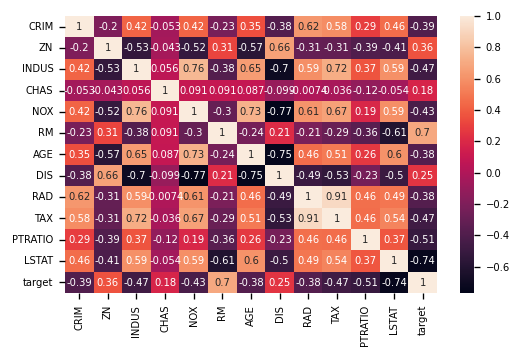

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 6

sns.heatmap(boston.corr(), annot=True)


<AxesSubplot: xlabel='target', ylabel='Count'>

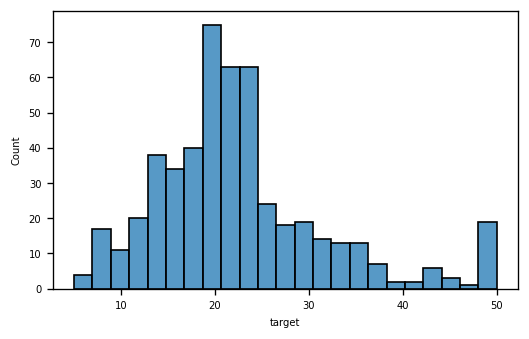

In [11]:
sns.histplot(x='target', data=boston)

/Users/zhangjiahao/Desktop/code/venv39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/zhangjiahao/Desktop/code/venv39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0.5, 1.0, 'Mean of column')

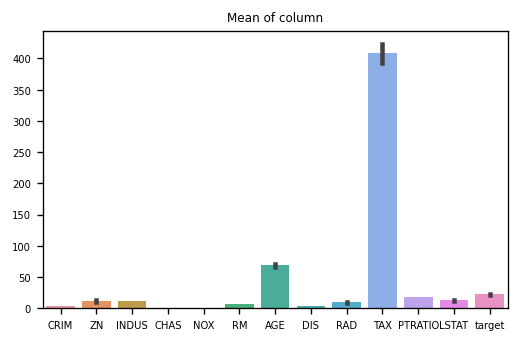

In [12]:
import numpy as np

barplot = sns.barplot(data= boston,estimator= np.mean)
barplot.set_title('Mean of column')

In [13]:
pred = boston.drop(columns='target',axis=1)
resp= boston.target

In [14]:
pred.shape

(506, 12)

In [15]:
from sklearn.model_selection import train_test_split

pred_train, pred_test, resp_train, resp_test = (
    train_test_split(pred, resp, test_size=0.3, random_state=7))

# Imputation

In [18]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values= np.nan, strategy="median")
pred_train = pd.DataFrame(imp_median.fit_transform(pred_train),columns=pred.columns)

In [19]:
pred_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64

In [20]:
imp_median.statistics_

array([2.4522e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3500e-01,
       6.1680e+00, 7.7700e+01, 3.1675e+00, 5.0000e+00, 3.3000e+02,
       1.9000e+01, 1.1730e+01])

# Scaling features

In [21]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
pred_train =pd.DataFrame( ss.fit_transform(pred_train),columns=pred.columns)
pred_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.381851,-0.475914,1.020183,-0.287348,0.238256,-0.753693,-0.447348,-0.441469,1.715968,1.563073,0.818711,0.250146
1,-0.219757,-0.475914,1.576911,-0.287348,0.627695,-1.705269,1.105565,-1.108027,-0.607876,0.196846,1.278092,2.914138
2,0.883524,-0.475914,1.020183,-0.287348,1.415423,0.638021,0.893967,-0.599213,1.715968,1.563073,0.818711,0.785656
3,1.266010,-0.475914,1.020183,-0.287348,0.273660,-0.583671,-0.339756,-0.839247,1.715968,1.563073,0.818711,0.376228
4,0.067024,-0.475914,1.020183,-0.287348,1.919922,-1.234966,0.969281,-0.788206,1.715968,1.563073,0.818711,-0.369419
...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.439539,0.075229,-0.746952,-0.287348,-1.275244,-0.527454,-1.713349,1.327751,-0.607876,-0.352031,0.221515,-0.652764
350,-0.441304,-0.475914,0.113847,-0.287348,0.176300,-0.195636,0.269933,-0.699656,-0.956452,-0.781587,1.186216,-0.519904
351,-0.330029,-0.475914,-0.442881,-0.287348,-0.133481,-0.910004,0.592709,0.343829,-0.607876,-0.578741,1.186216,0.487397
352,-0.442026,3.051403,-1.415319,-0.287348,-1.319498,1.404492,-1.257875,1.718258,-0.840260,-0.447488,-2.672586,-1.197764


# Piplines

In [23]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                       ('scaler', StandardScaler())
                       ])


In [26]:
from sklearn.model_selection import train_test_split

pred_train, pred_test, resp_train, resp_test = (
    train_test_split(pred, resp, test_size=0.3, random_state=7))

In [28]:
pd.DataFrame(pipe.fit_transform(pred_train),columns=pred.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.373486,-0.47818,-0.172294,-0.275659,-0.082983,-0.244610,0.973469,-0.587618,-0.421039,0.132810,-0.292239,0.608081
1,-0.364834,-0.47818,-0.570017,-0.275659,-0.547154,0.066531,-1.442526,0.812697,-0.535603,-0.720611,0.549599,-0.911439
2,-0.005921,-0.47818,1.051118,-0.275659,1.833872,-1.277035,1.002534,-0.804606,1.641112,1.510054,0.830212,-0.350300
3,-0.391339,-0.47818,-1.073597,-0.275659,-0.401026,0.070774,0.174193,-0.211893,-0.535603,-0.667640,-0.853464,-0.891994
4,-0.237972,-0.47818,1.274931,-0.275659,2.702044,-1.217635,1.140591,-1.054601,-0.535603,-0.037874,-1.742070,0.078888
...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.393875,-0.47818,-0.901200,-0.275659,-0.358047,-0.523224,-0.327172,0.909912,-0.535603,-1.091407,0.830212,-0.298909
350,-0.388389,-0.47818,0.418996,-0.275659,-1.028517,-0.361996,-0.955694,0.855079,-0.650167,-0.708839,-1.134076,-0.321132
351,-0.390962,-0.47818,-1.314045,-0.275659,-0.590133,1.011270,-0.370769,-0.450414,-0.764730,-1.273863,-0.292239,-1.065614
352,1.023739,-0.47818,1.051118,-0.275659,1.171998,-0.534538,0.948038,-0.961586,1.641112,1.510054,0.830212,0.505298


In [29]:
pipe.transform(pred_test)

array([[-0.15101988, -0.47818033,  1.27493124, ..., -0.03787438,
        -1.74207021, -0.0947317 ],
       [-0.39059277,  1.31025957, -0.71670508, ..., -0.91483752,
        -0.3857762 , -1.18784224],
       [-0.39417047,  2.87514449, -1.23994439, ..., -0.92660884,
        -0.05839489, -1.1656189 ],
       ...,
       [-0.3944523 , -0.47818033, -1.40024313, ...,  0.07395313,
        -1.18084511, -0.56419976],
       [-0.31489955, -0.47818033, -0.45508543, ..., -0.60289761,
         1.2043616 ,  0.01221813],
       [-0.3608332 , -0.47818033, -0.5700166 , ..., -0.72061079,
         0.54959898, -0.91560632]])

In [30]:
pipe.named_steps

{'imputer': SimpleImputer(strategy='median'), 'scaler': StandardScaler()}

In [32]:
pipe.named_steps.imputer.statistics_

array([2.5199e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3500e-01,
       6.1985e+00, 7.6600e+01, 3.1222e+00, 5.0000e+00, 3.3000e+02,
       1.8950e+01, 1.1415e+01])

# Baseline Model pipelin

In [35]:
from sklearn.dummy import DummyRegressor

pipe_dummy = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                       ('scaler', StandardScaler()),
                       ("regressor",DummyRegressor(strategy='mean'))
                       ])


In [36]:
pipe_dummy.fit(pred_train,resp_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('regressor', DummyRegressor())])

In [39]:
from sklearn.metrics import mean_absolute_error

resp_train_predict = pipe_dummy.predict(pred_train)
resp_test_predict = pipe_dummy.predict(pred_test)

print("MAE train dummy", mean_absolute_error(resp_train, resp_train_predict))
print("MAE test dummy", mean_absolute_error(resp_test, resp_test_predict))


MAE train 6.394326343004883
MAE test 7.206950639310139


# Linear Regression Pipeline

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

pipe_linreg = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                       ('scaler', StandardScaler()),
                       ("regressor", LinearRegression())
                       ])

pipe_linreg.fit(pred_train, resp_train)


resp_train_predict = pipe_linreg.predict(pred_train)
resp_test_predict = pipe_linreg.predict(pred_test)

print("MAE train linear", mean_absolute_error(resp_train, resp_train_predict))
print("MAE test linnear", mean_absolute_error(resp_test, resp_test_predict))


MAE train linear 3.181257549736819
MAE test linnear 3.8363102943035674


In [42]:
print(pipe_linreg.score(pred_train,resp_train),pipe_linreg.score(pred_test,resp_test))

0.7669935482265414 0.6612170741321024


# Polynomial Features

In [44]:
from sklearn.preprocessing import PolynomialFeatures

pipe_linreg_poly = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('ploy', PolynomialFeatures(
                                       degree=3, include_bias=False)),
                                   ('scaler', StandardScaler()),
                                   ("regressor", LinearRegression())
                                   ])

pipe_linreg_poly.fit(pred_train, resp_train)


resp_train_predict = pipe_linreg_poly.predict(pred_train)
resp_test_predict = pipe_linreg_poly.predict(pred_test)

print("MAE train linear_poly", mean_absolute_error(resp_train, resp_train_predict))
print("MAE test linnear_poly", mean_absolute_error(resp_test, resp_test_predict))
# overfitting

MAE train linear_poly 8.821230324977896e-10
MAE test linnear_poly 1827.3082130430098


# Regularisation

In [45]:
pipe_linreg_poly.named_steps.regressor.coef_

array([-1.96563691e+04,  7.94365748e+04,  5.55693064e+04,  1.04885868e+02,
        1.94225924e+04, -3.03513522e+04, -2.57341675e+04, -9.42950034e+04,
       -9.51707429e+03, -1.12033677e+05, -6.12435682e+04, -1.63026237e+05,
       -1.48059195e+04,  3.57423002e+04, -6.11214010e+04, -4.45122235e+01,
       -1.43758102e+05, -5.38747401e+04,  2.24175713e+05,  1.35975436e+04,
        1.66399731e+04,  1.33104270e+05, -6.37716635e+04,  3.84149225e+04,
        5.07834957e+04, -3.75829636e+04,  2.43495598e+02, -1.85787419e+05,
        2.13314537e+05, -1.21942986e+04, -6.91751908e+04,  2.66307868e+04,
       -4.37435286e+04, -1.26138068e+05,  4.61728698e+03, -1.45338530e+04,
       -2.75297807e+02,  6.15842976e+04,  9.58218885e+04, -6.89587774e+04,
       -1.11725670e+04,  2.11954186e+05, -7.56032374e+04, -1.64134051e+05,
       -4.79364868e+04,  1.04883022e+02,  3.30162997e+02, -7.87638175e+00,
       -2.92816012e+02,  2.40116744e+02, -3.90569999e+02, -1.63424262e+02,
        2.00653012e+01,  

In [46]:
from sklearn.linear_model import LassoLarsCV

pipe_lasso_poly = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                  ('ploy', PolynomialFeatures(
                                      degree=3, include_bias=False)),
                                  ('scaler', StandardScaler()),
                                  ("regressor", LassoLarsCV(max_iter=100))
                                  ])

pipe_lasso_poly.fit(pred_train, resp_train)


resp_train_predict = pipe_lasso_poly.predict(pred_train)
resp_test_predict = pipe_lasso_poly.predict(pred_test)

print("MAE train lasso_poly", mean_absolute_error(
    resp_train, resp_train_predict))
print("MAE test lasso_poly", mean_absolute_error(resp_test, resp_test_predict))
# overfitting


/Users/zhangjiahao/Desktop/code/venv39/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


MAE train lasso_poly 2.0775930546488577
MAE test lasso_poly 2.5869490677015334


In [47]:
pipe_lasso_poly.named_steps.regressor.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.74839925e-01,
        2.66795530e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.39032046e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [48]:
len(pipe_lasso_poly.named_steps.regressor.coef_)

454

In [49]:
sum(pipe_lasso_poly.named_steps.regressor.coef_ !=0)

44

In [57]:

# poly_feature_names = (
#     pipe_lasso_poly.named_steps.get_feature_names_out(pred_train.columns)
# )
# [poly_feature_names[i] for i in pipe_lasso_poly.named_steps.regressor.active_]